<a href="https://colab.research.google.com/github/Akhilajibin/Akhila.github.io/blob/master/Capstone_Project_Lead_Scores_Analysis_upgrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2170]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [2171]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

Importing the "Leads" Dataset

In [2172]:
# Read the dataset

In [2173]:
# import os
# os.chdir(r'C:\Users\Rajat meshram\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment')

In [2174]:
#Loading data
leads_df= pd.read_csv('Leads.csv')
leads= leads_df.copy()
leads.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [2175]:
#Checking the Shape of dataset
leads.shape

(9240, 37)

In [2176]:
# Inspecting the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2177]:
# Checking the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2178]:
# Checking the info to see the types of the feature variables and the null values present
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As it seems that there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 1: Data Cleaning and Preparation

# Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [2179]:
# checking the columns for null values
leads.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [2180]:
# Finding the null percentages across columns
round(leads.isnull().sum()/len(leads.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


We see that for some columns we have high percentage of missing values. We can drop the columns with missing values greater than 40% .

In [2181]:
# dropping the columns with missing values greater than or equal to 40% .
leads=leads.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [2182]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


## 1) Column: 'Specialization'

This column has 37% missing values

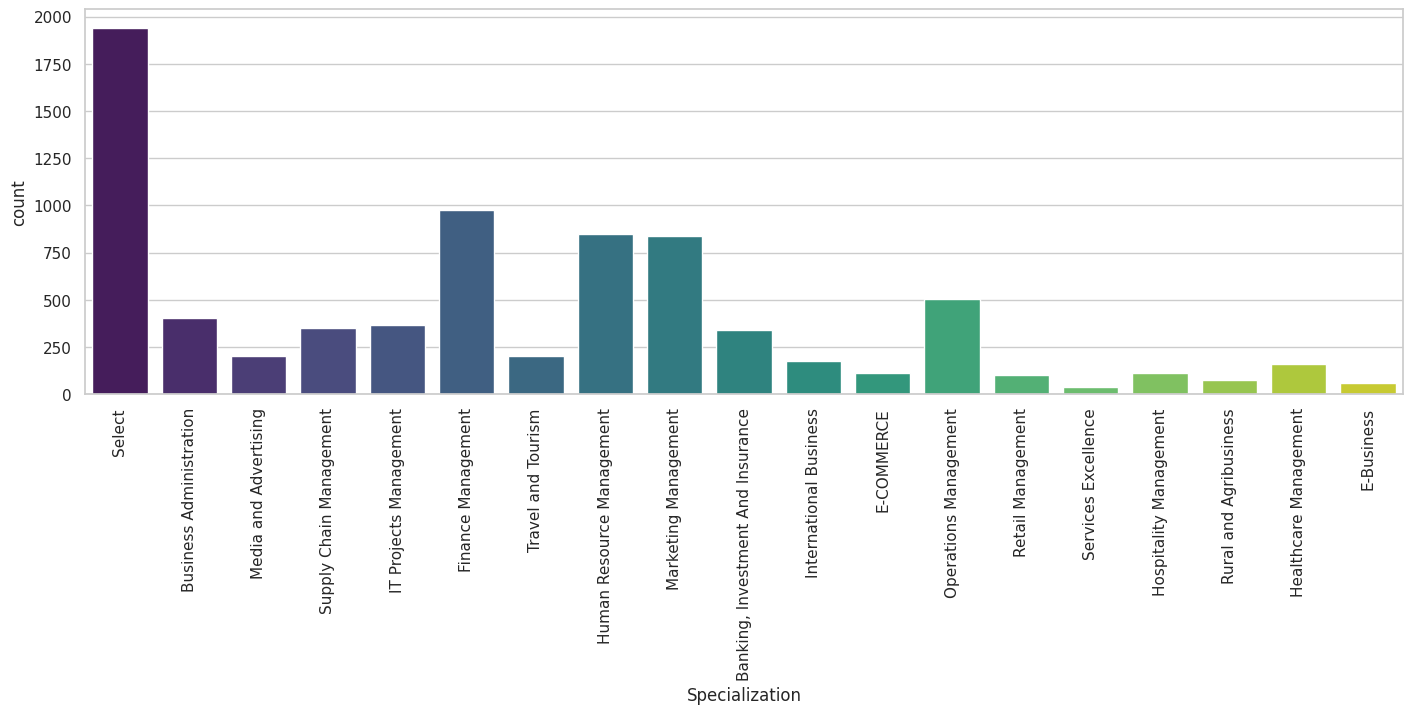

In [2183]:
plt.figure(figsize=(17,5))
sns.countplot(data=leads,x='Specialization',palette='viridis')
plt.xticks(rotation=90)
plt.show()

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [2184]:
# Creating a separate category called 'Others' for this
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

## 2) Tags column

'Tags' column has 36% missing values

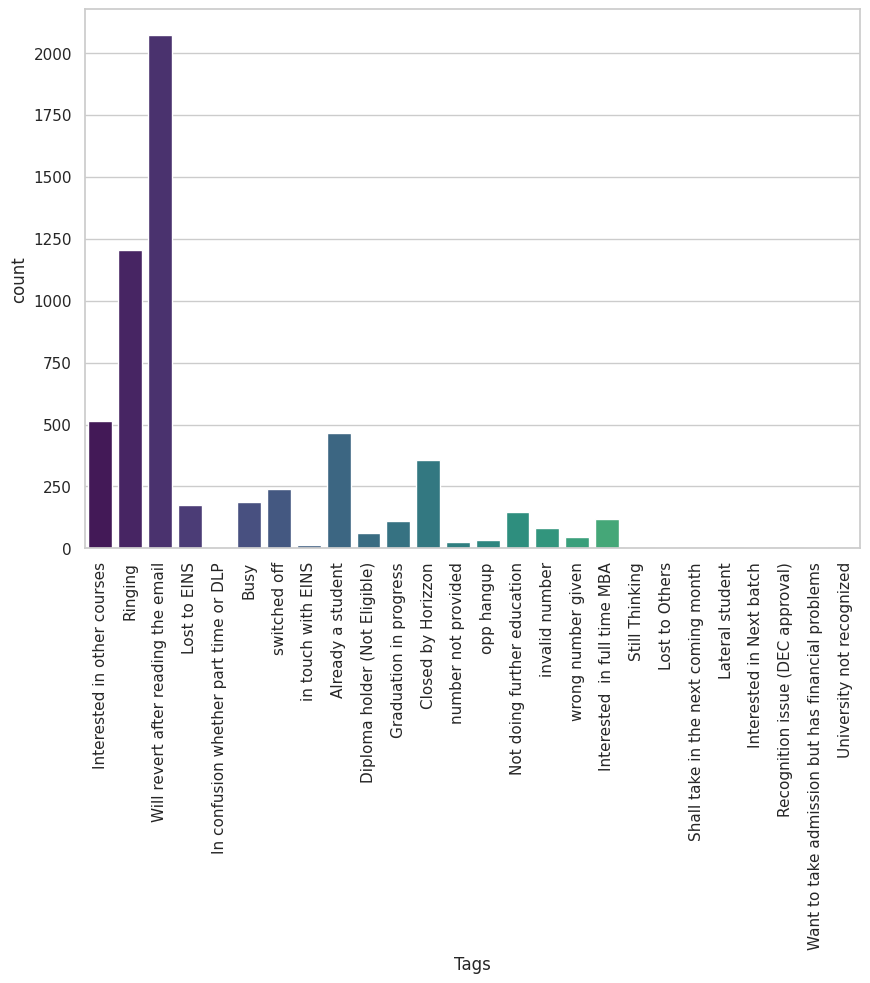

In [2185]:
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(data=leads,x='Tags',palette='viridis')
plt.xticks(rotation=90)
plt.show()

Since most values are 'Will revert after reading the email' , we can impute missing values in this column with this value.

In [2186]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads['Tags']=leads['Tags'].replace(np.nan,'Will revert after reading the email')

## 3) Column: 'What matters most to you in choosing a course'

this column has 29% missing values.

# Visualizing this column
sns.countplot(data=leads,x='What matters most to you in choosing a course')
plt.xticks(rotation=45)
plt.show()

In [2187]:
# Finding the percentage of the different categories of this column:
round(leads['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

,proportion
What matters most to you in choosing a course,
Better Career Prospects,100.0
Flexibility & Convenience,0.0
Other,0.0


We can see that this is highly skewed column so we can remove this column.

In [2188]:
# Dropping this column
leads=leads.drop('What matters most to you in choosing a course',axis=1)

## 4) Column: 'What is your current occupation'
   
this column has 29% missing values

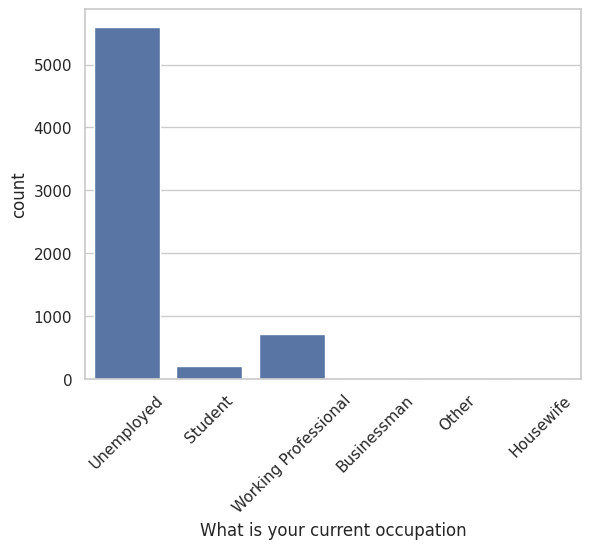

In [2189]:
sns.countplot(data=leads,x='What is your current occupation')
plt.xticks(rotation=45)
plt.show()

In [2190]:
# Finding the percentage of the different categories of this column:
round(leads['What is your current occupation'].value_counts(normalize=True),2)*100

,proportion
What is your current occupation,
Unemployed,85.0
Working Professional,11.0
Student,3.0
Other,0.0
Housewife,0.0
Businessman,0.0


Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [2191]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
leads['What is your current occupation']=leads['What is your current occupation'].replace(np.nan,'Unemployed')

## 5) Column: 'Country'

This column has 27% missing values

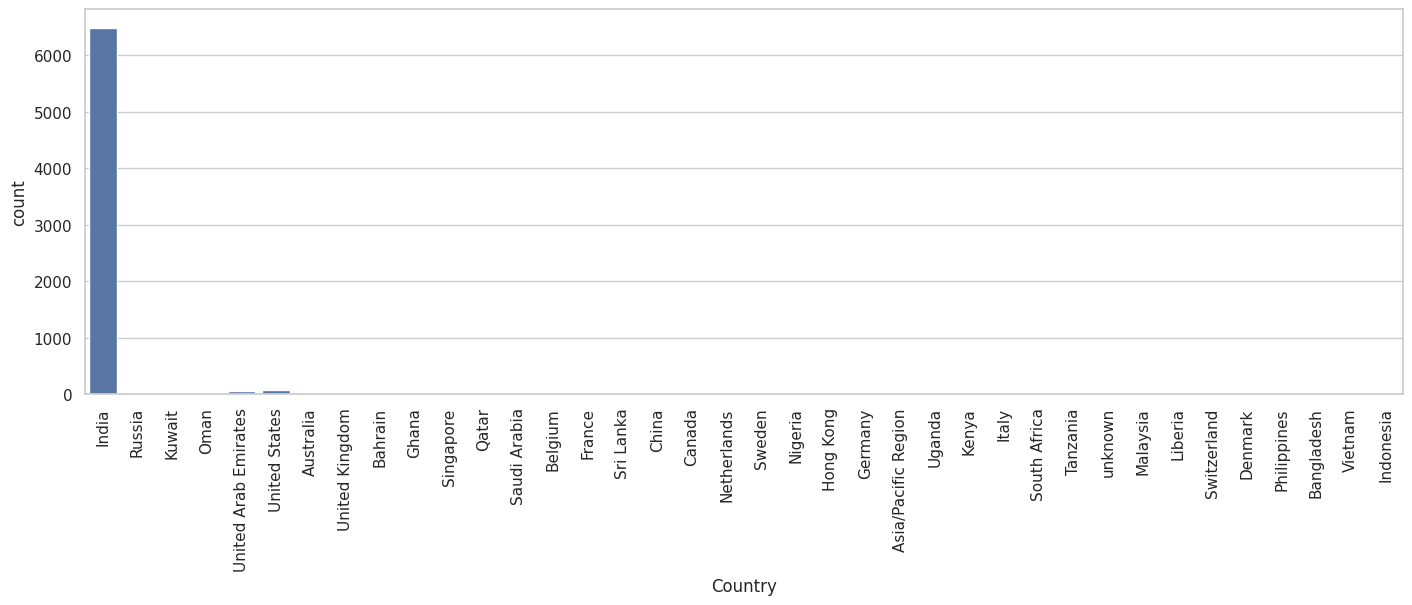

In [2192]:
plt.figure(figsize=(17,5))
sns.countplot(data=leads,x='Country')
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column but it is an important information w.r.t. to the lead. Since most values are 'India' , we can impute missing values in this column with this value.

In [2193]:
# Imputing the missing data in the 'Country' column with 'India'
leads['Country']=leads['Country'].replace(np.nan,'India')

## 6) Column: 'City'

This column has 40% missing values

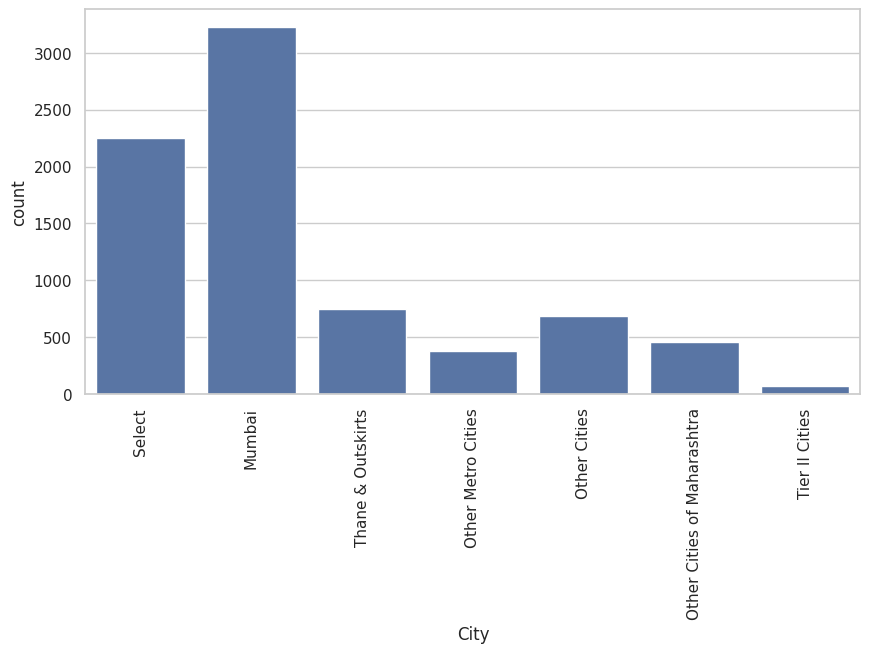

In [2194]:
plt.figure(figsize=(10,5))
sns.countplot(data=leads,x='City')
plt.xticks(rotation=90)
plt.show()

In [2195]:
# Finding the percentage of the different categories of this column:
round(leads['City'].value_counts(normalize=True),2)*100

,proportion
City,
Mumbai,41.0
Select,29.0
Thane & Outskirts,10.0
Other Cities,9.0
Other Cities of Maharashtra,6.0
Other Metro Cities,5.0
Tier II Cities,1.0


Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [2196]:
# Imputing the missing data in the 'City' column with 'Mumbai'
leads['City']=leads['City'].replace(np.nan,'Mumbai')

In [2197]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,1.0
Total Time Spent on Website,0.0
Page Views Per Visit,1.0


Rest missing values are under 2% so we can drop these rows.

In [2198]:
# Dropping the rows with null values
leads.dropna(inplace = True)

In [2199]:
# Finding the null percentages across columns after removing the above columns
round(leads.isnull().sum()/len(leads.index),2)*100

,0
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


Now we don't have any missing value in the dataset.

We can find the percentage of rows retained.

In [2200]:
# Percentage of rows retained
(len(leads.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data .

## Exploratory Data Anaysis

#### Checking for duplicates

In [2201]:
leads[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


We see there are no duplicate records in our lead dataset.

#### Univariate Analysis and Bivariate Analysis

1) Converted

   Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [2202]:
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

The lead conversion rate is 38%.

#### 2) Lead Origin

In [2203]:
leads["Converted"] = leads["Converted"].astype(str)  # Convert to string


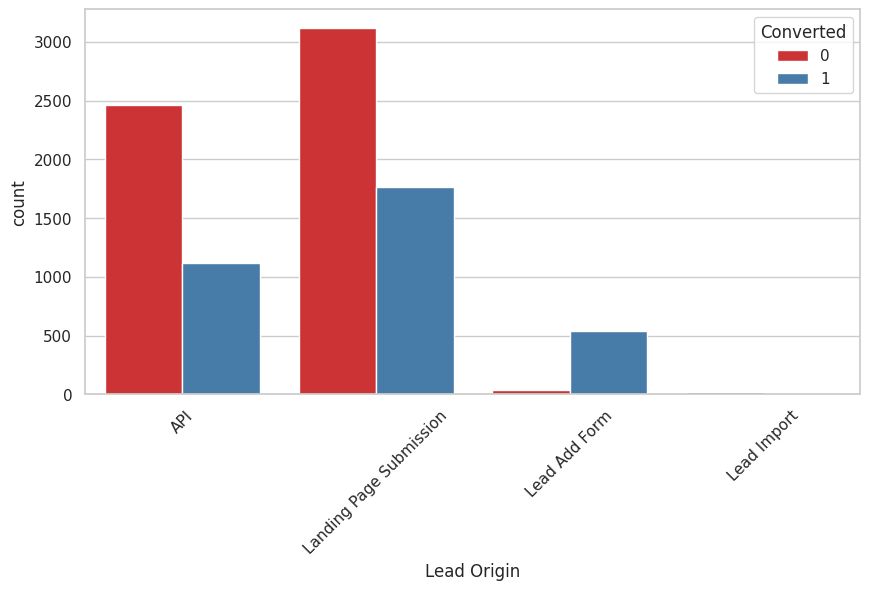

In [2204]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Lead Origin", hue="Converted", data=leads, palette="Set1")
plt.xticks(rotation=45)
plt.show()

##### Inference :


1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3.Lead Import are very less in count.


##### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

## 3) Lead Source

In [2205]:
leads["Converted"] = leads["Converted"].astype(str)


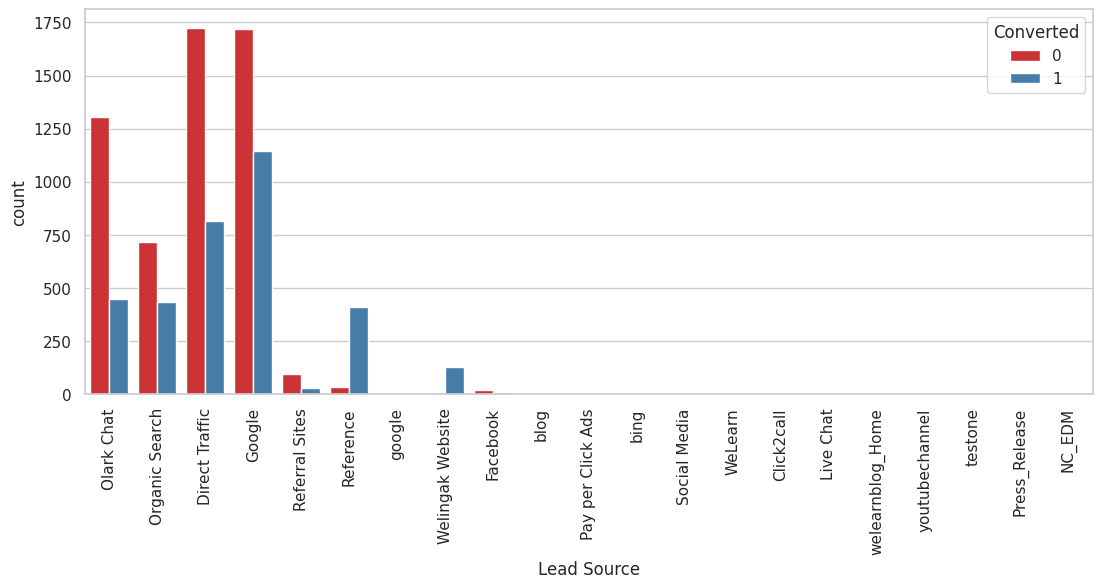

In [2206]:
plt.figure(figsize=(13,5))
sns.countplot(x="Lead Source", hue="Converted", data=leads, palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [2207]:
# Need to replace 'google' with 'Google'
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

In [2208]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

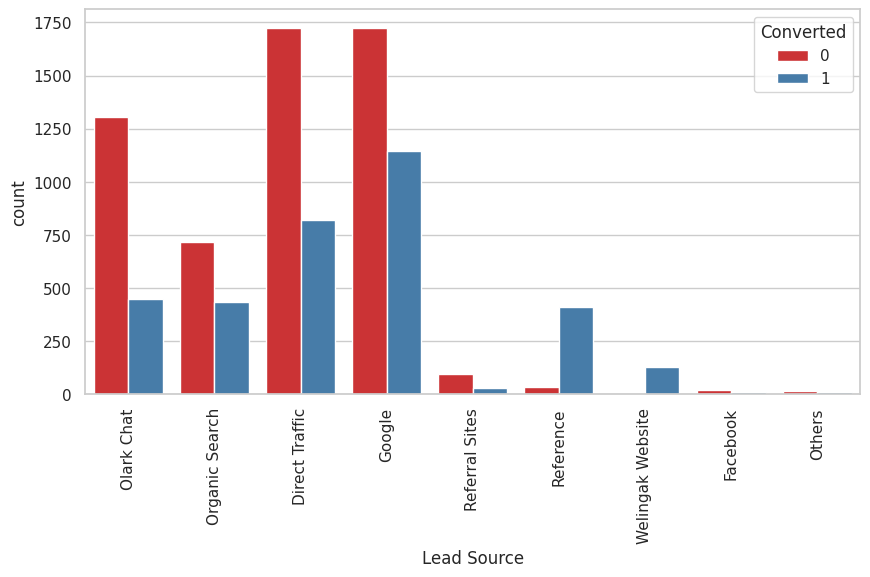

In [2209]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

#### Inference

1.Google and Direct traffic generates maximum number of leads.

2.Conversion Rate of reference leads and leads through welingak website is high.

##### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

## 4) Do not Email

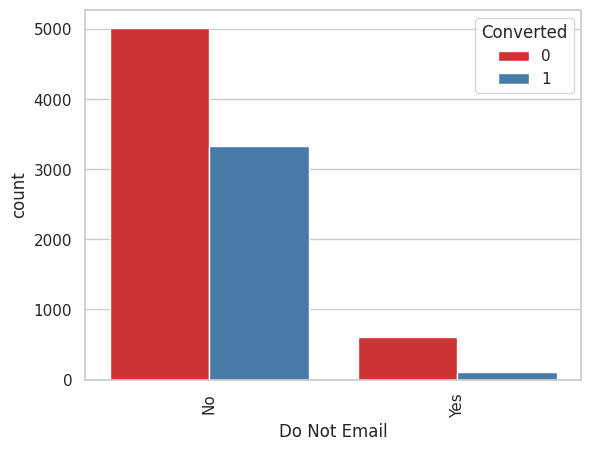

In [2210]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

##### Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 5) Do not call

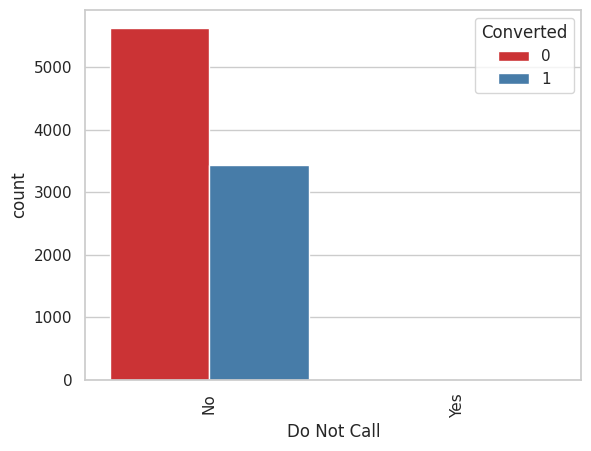

In [2211]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.



## 6) TotalVisits

In [2212]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
5%,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
90%,7.000000
95%,10.000000


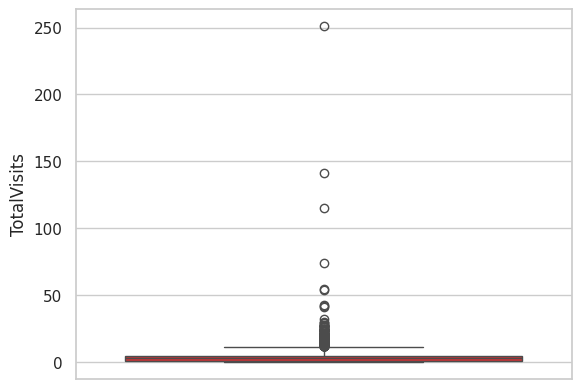

In [2213]:
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')
plt.show()

##### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [2214]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

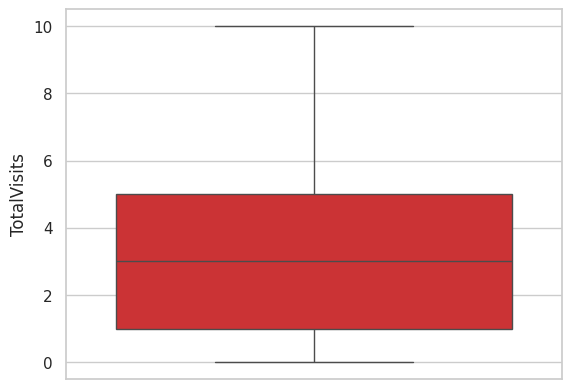

In [2215]:
# Visualizing again
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')
plt.show()

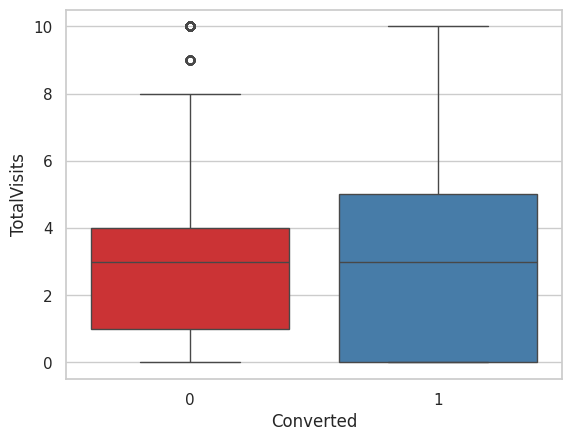

In [2216]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads,palette='Set1')
plt.show()

Inference

Median for converted and not converted leads are the same.
Nothing can be concluded on the basis of Total Visits.



## 7) Total Time Spent on Website

In [2217]:
leads['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,9074.000000
mean,482.887481
std,545.256560
min,0.000000
25%,11.000000
50%,246.000000
75%,922.750000
max,2272.000000


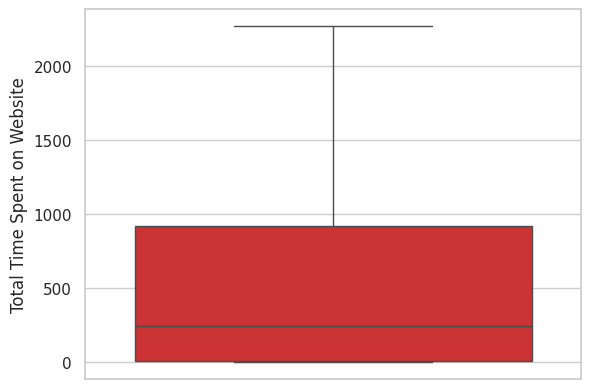

In [2218]:
sns.boxplot(leads['Total Time Spent on Website'],orient='vert',palette='Set1')
plt.show()

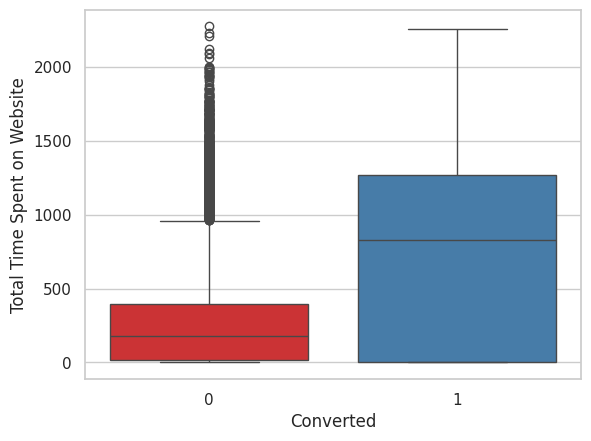

In [2219]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads,palette='Set1')
plt.show()

Inference

Leads spending more time on the weblise are more likely to be converted.
##### Website should be made more engaging to make leads spend more time.




## 8) Page Views Per Visit

In [2220]:
leads['Page Views Per Visit'].describe()

,Page Views Per Visit
count,9074.000000
mean,2.370151
std,2.160871
min,0.000000
25%,1.000000
50%,2.000000
75%,3.200000
max,55.000000


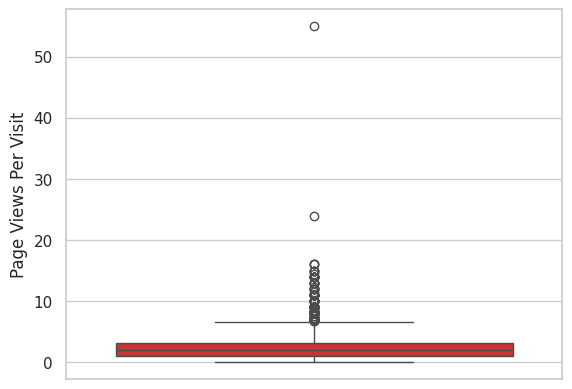

In [2221]:
sns.boxplot(leads['Page Views Per Visit'],orient='vert',palette='Set1')
plt.show()

##### As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [2222]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

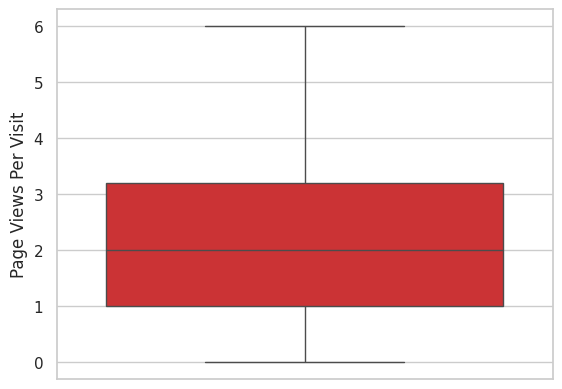

In [2223]:
# Visualizing again
sns.boxplot(leads['Page Views Per Visit'],palette='Set1',orient='vert')
plt.show()

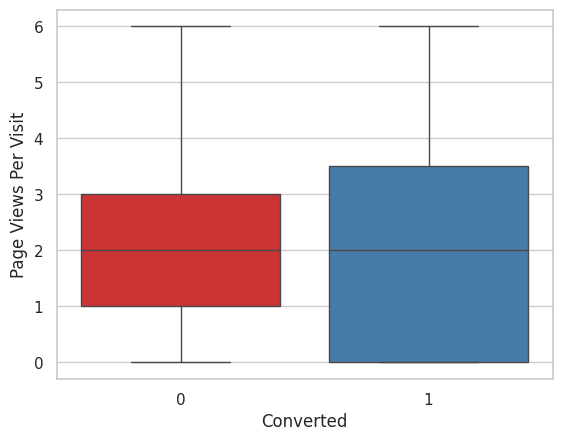

In [2224]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =leads,palette='Set1')
plt.show()

Inference

*Median for converted and unconverted leads is the same.
    
##### Nothing can be said specifically for lead conversion from Page Views Per Visit





## 9) Last Activity

In [2225]:
leads['Last Activity'].describe()

,Last Activity
count,9074
unique,17
top,Email Opened
freq,3432


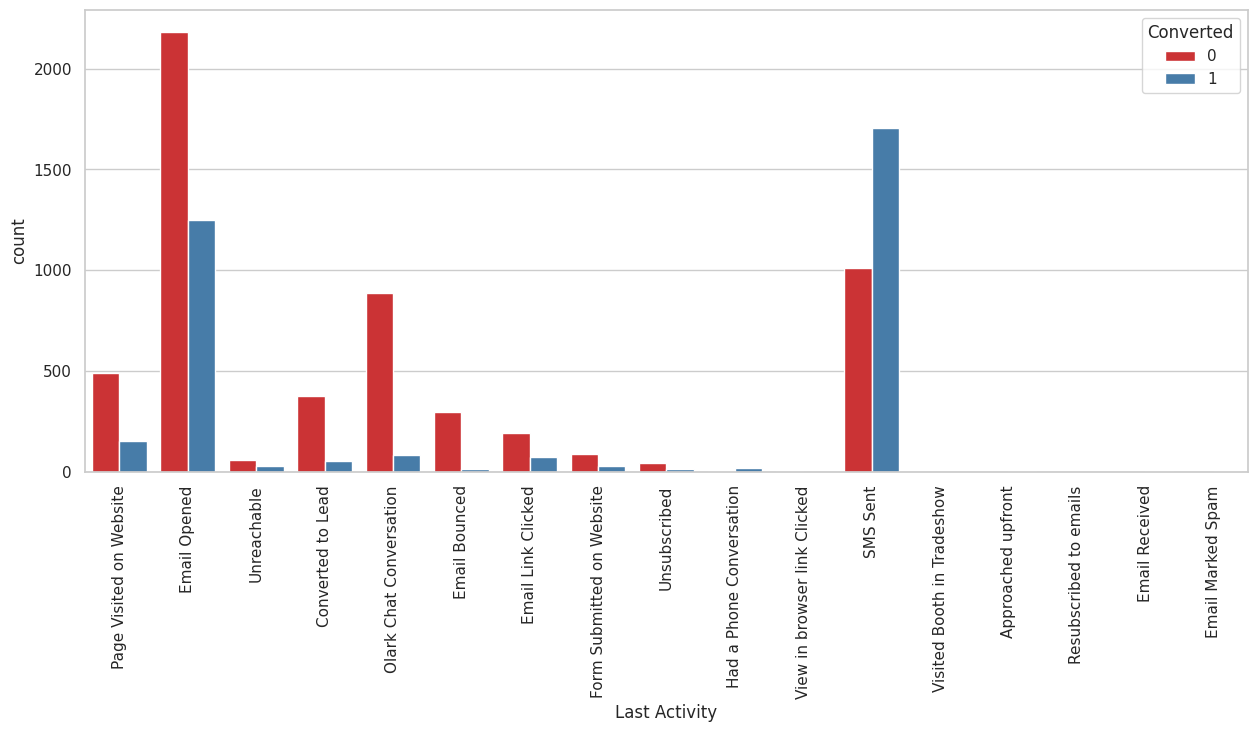

In [2226]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

In [2227]:
# We can club the last activities to "Other_Activity" which are having less data.
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

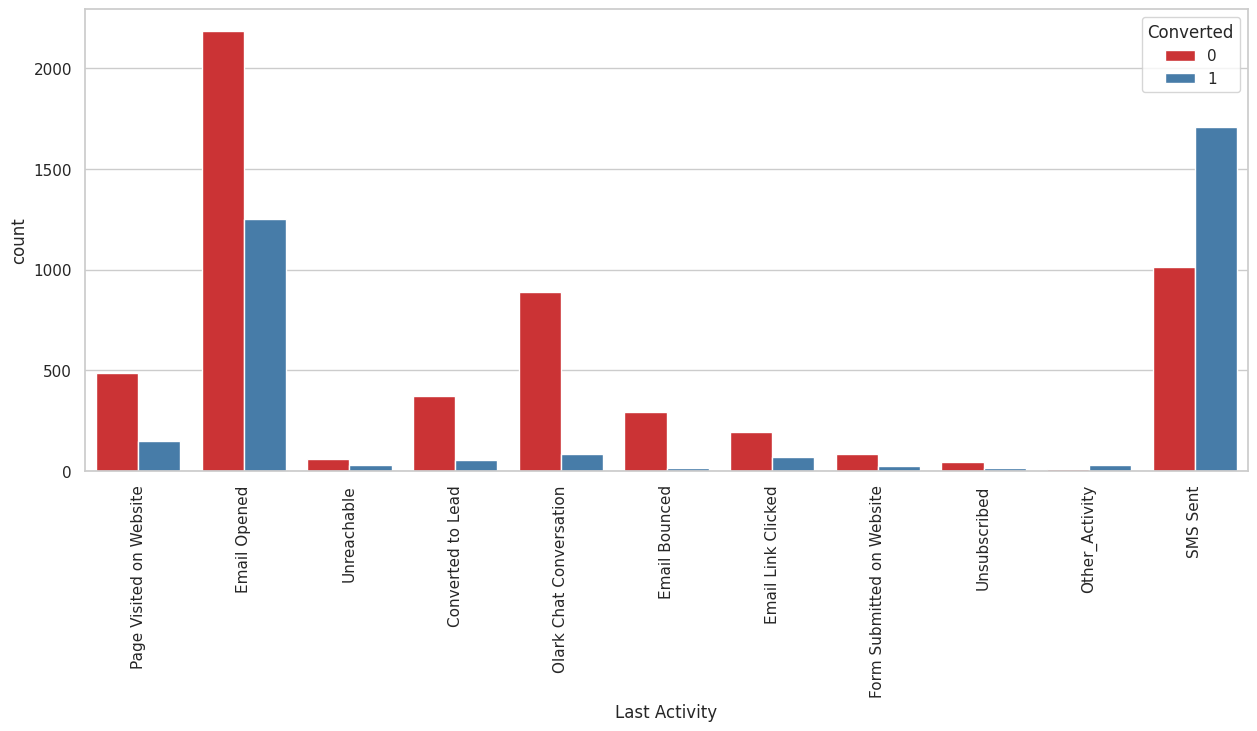

In [2228]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

nference

1.Most of the lead have their Email opened as their last activity.

2.Conversion rate for leads with last activity as SMS Sent is almost 60%.




    
## 10) Country

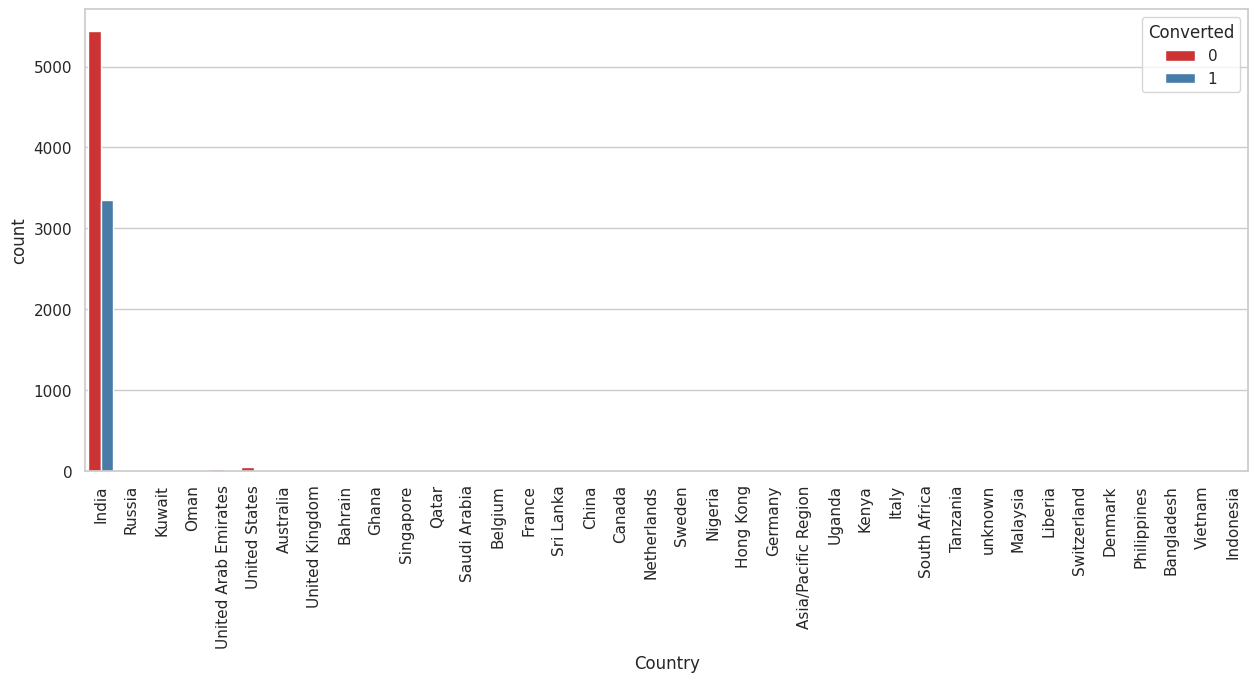

In [2229]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

##### Most values are 'India' no such inference can be drawn





## 11) Specialization

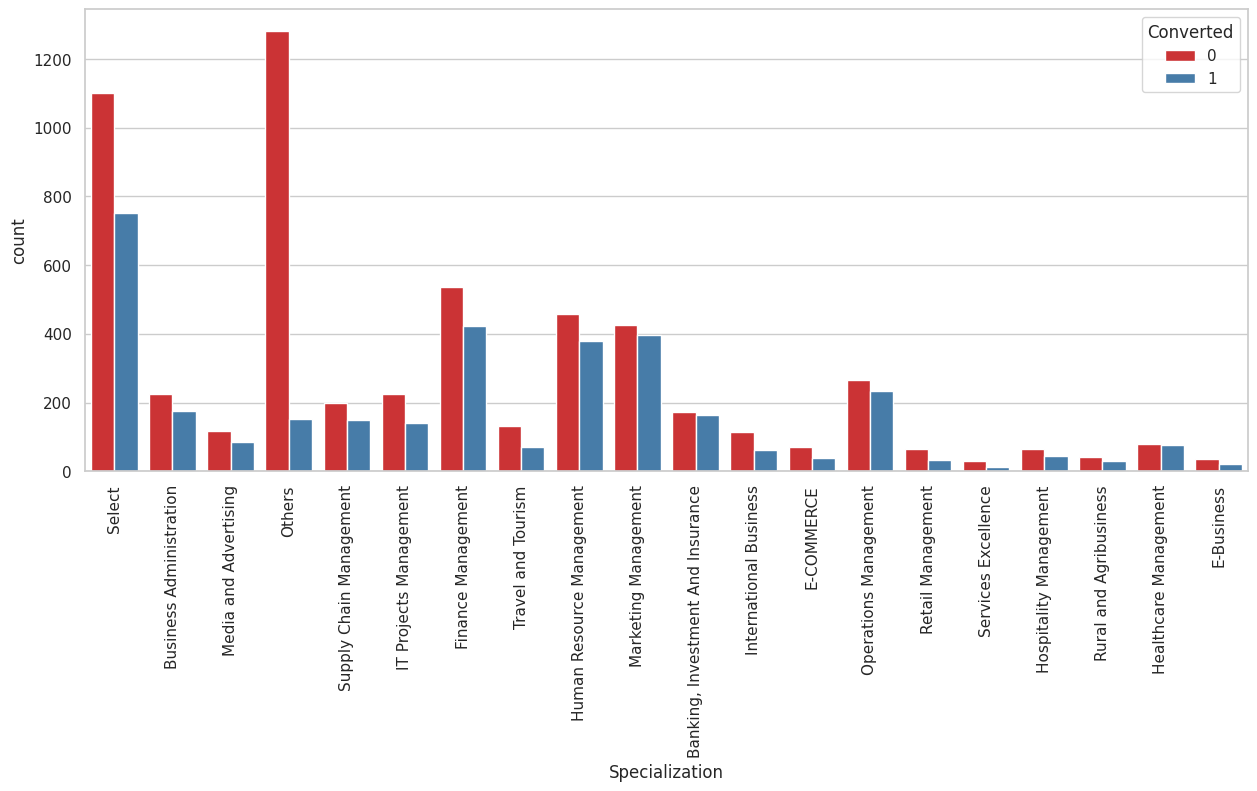

In [2230]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Specialization", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

##### Focus should be more on the Specialization with high conversion rate.


## 12) What is your current occupation

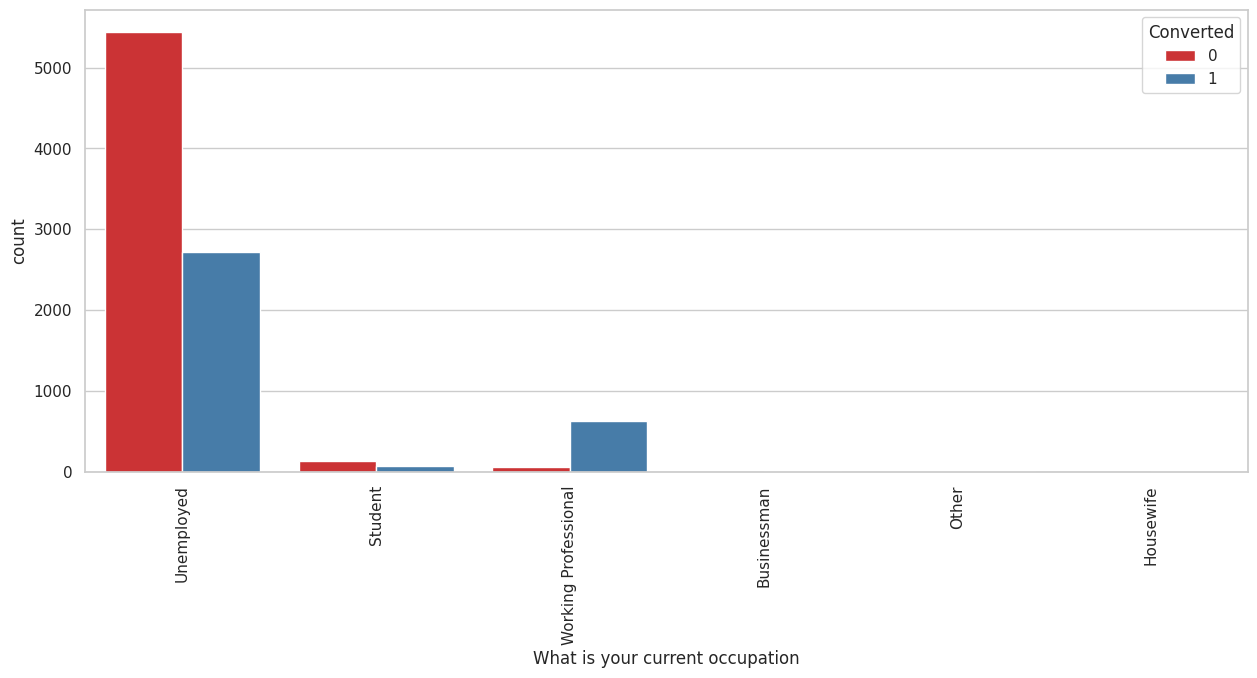

In [2231]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference


1.Working Professionals going for the course have high chances of joining it.

2.Unemployed leads are the most in numbers but has around 30-35% conversion rate.


## 13) Search

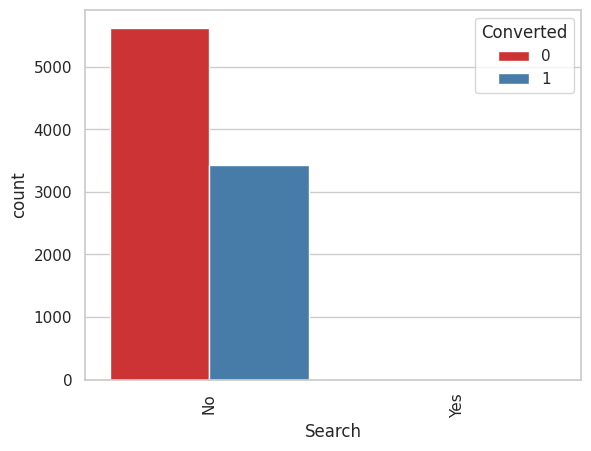

In [2232]:
sns.countplot(x = "Search", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 14) Magazine

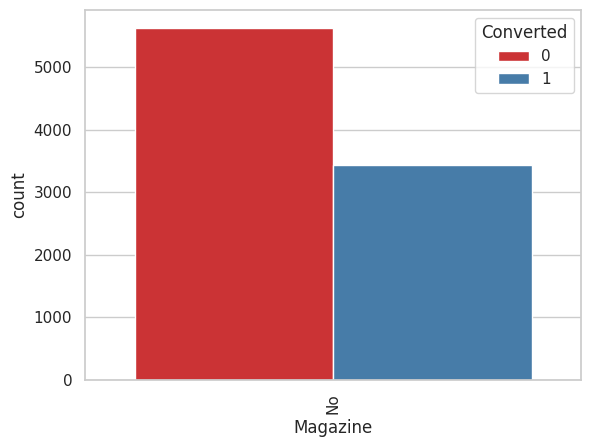

In [2233]:
sns.countplot(x = "Magazine", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 15) Newspaper Article

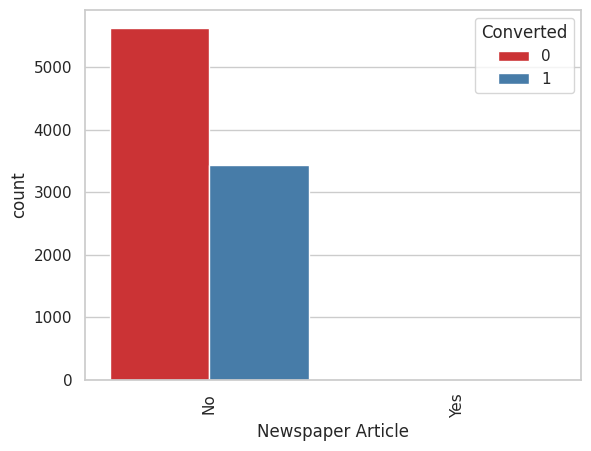

In [2234]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference
Most entries are 'No'. No Inference can be drawn with this parameter.
## 16) X Education Forums

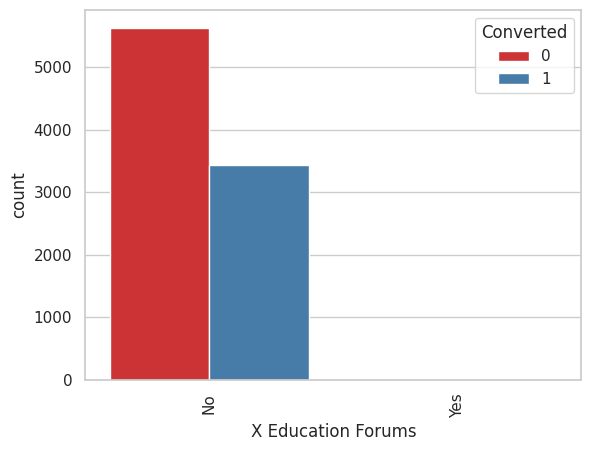

In [2235]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 17) Newspaper

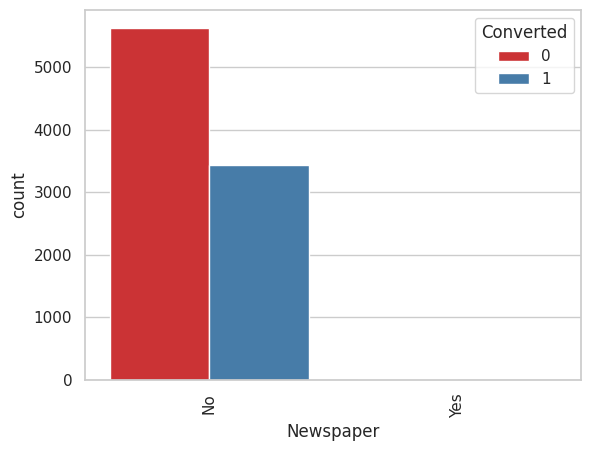

In [2236]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 18) Digital Advertisement

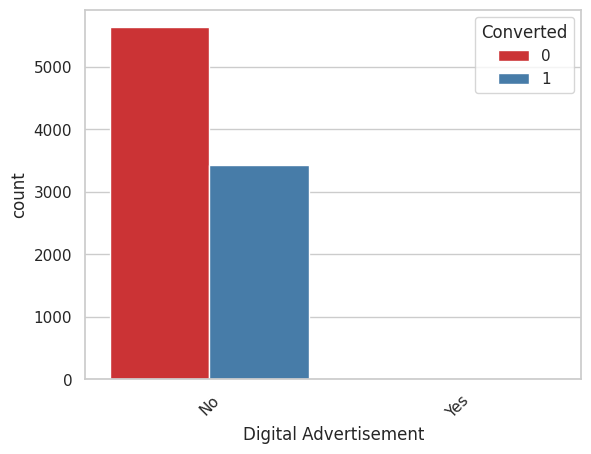

In [2237]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.


## 19) Through Recommendations

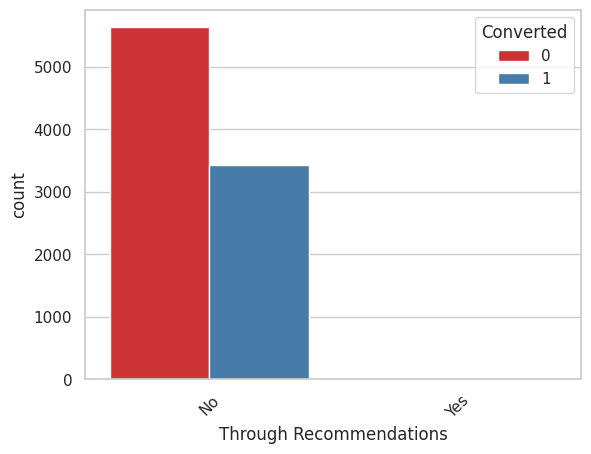

In [2238]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 20) Receive More Updates About Our Courses

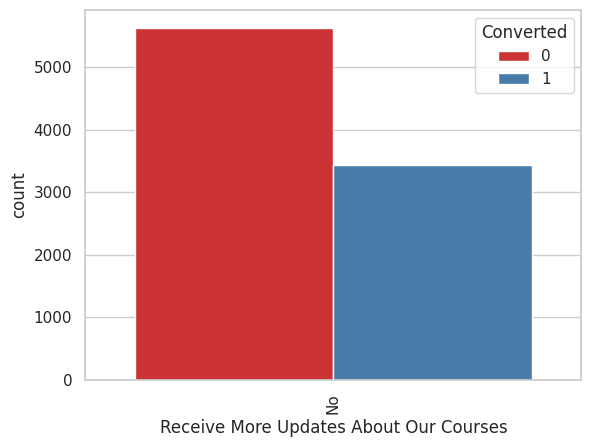

In [2239]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.


## 21) Tags

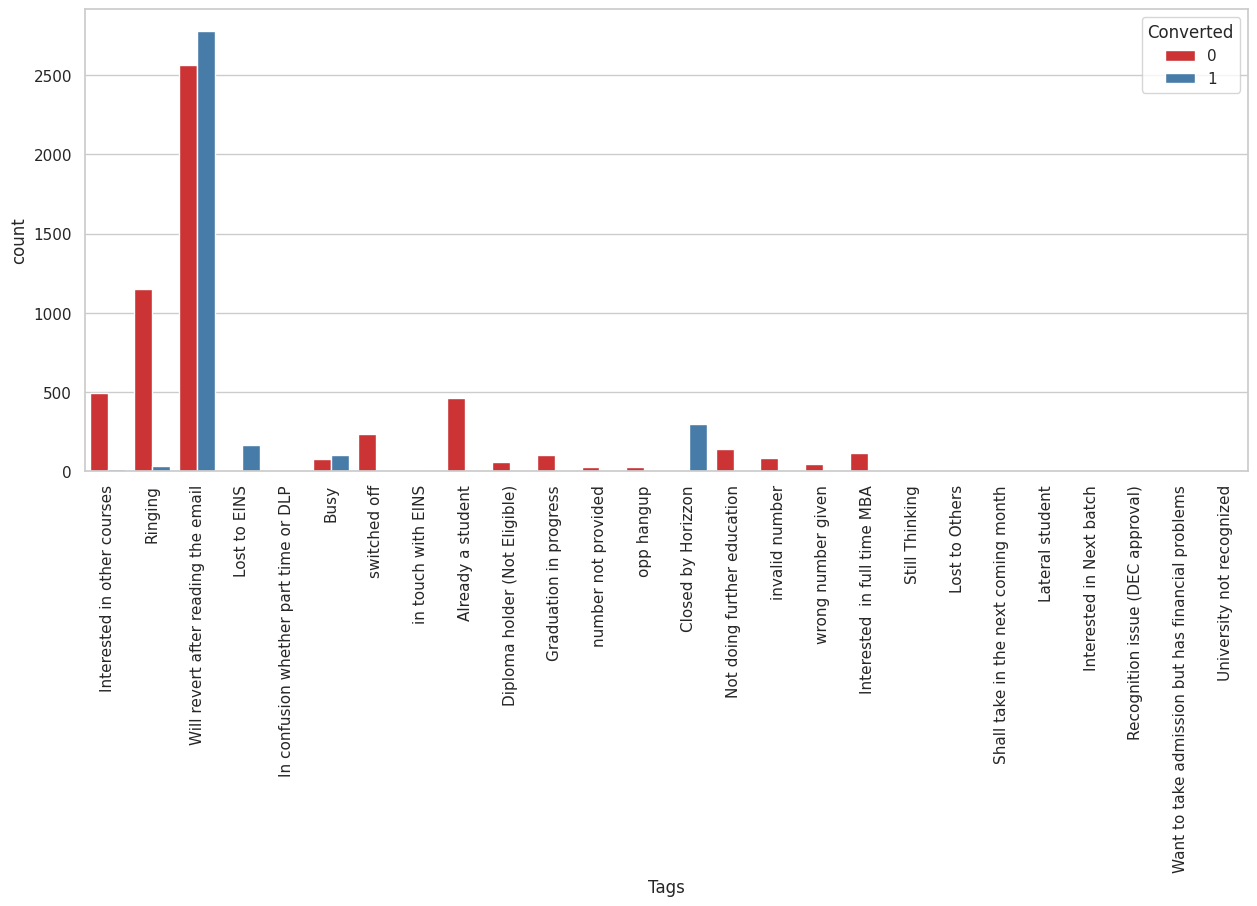

In [2240]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Tags", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

Inference

Since this is a column which is generated by the sales team for their analysis , so this is not available for model building . So we will need to remove this column before building the model.


## 22) Update me on Supply Chain Content

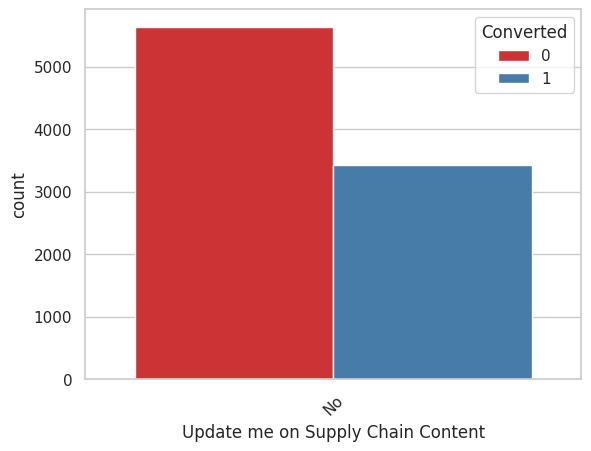

In [2241]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.

## 23) Get updates on DM Content

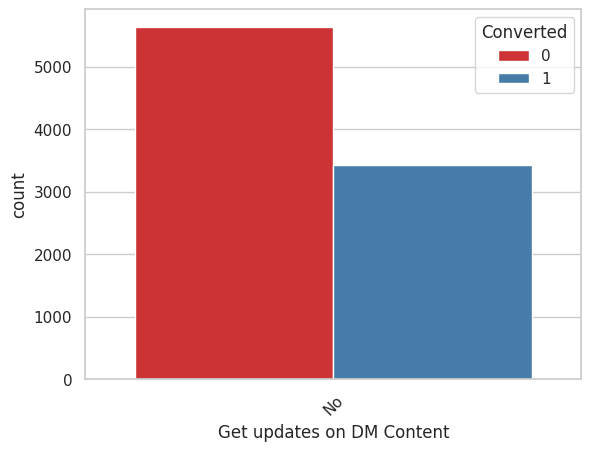

In [2242]:
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.



## 24) City

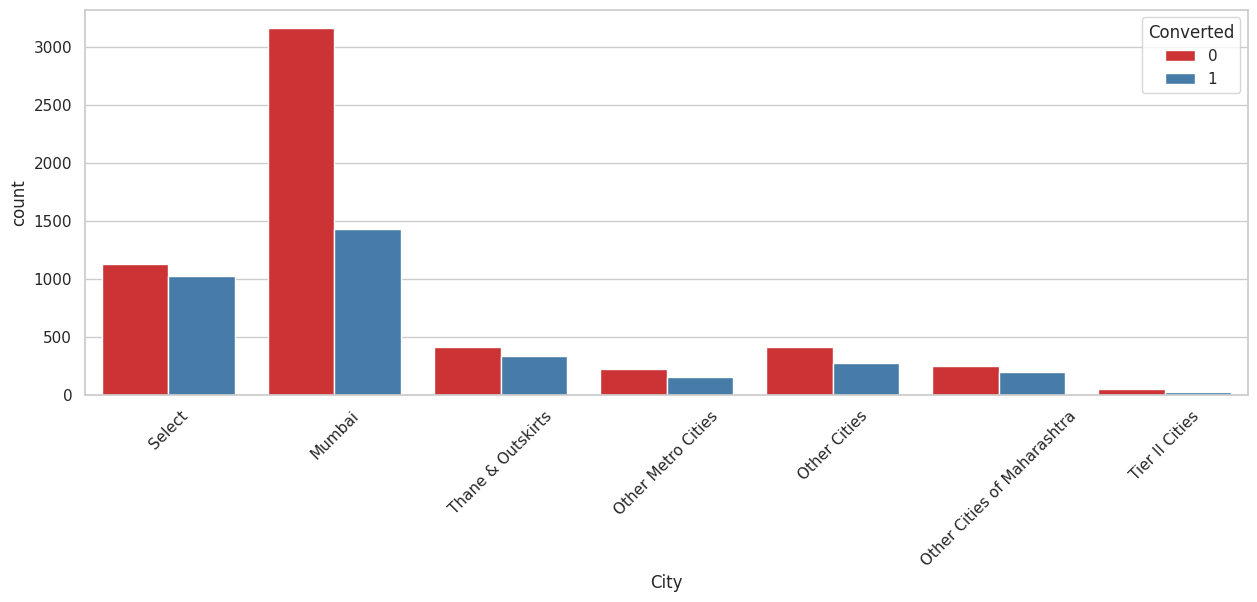

In [2243]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most leads are from mumbai with around 50% conversion rate.
## 25) I agree to pay the amount through cheque

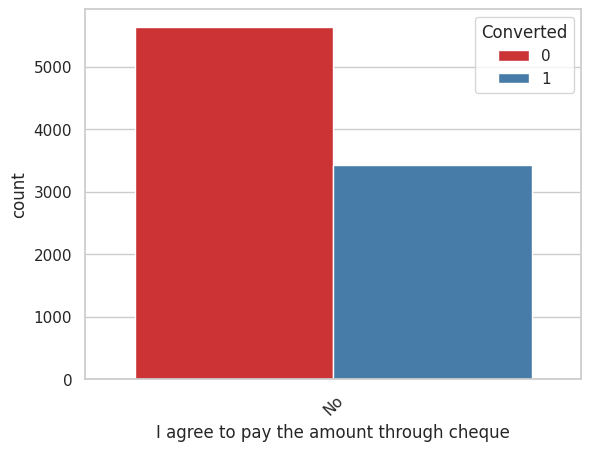

In [2244]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.




## 26) A free copy of Mastering The Interview

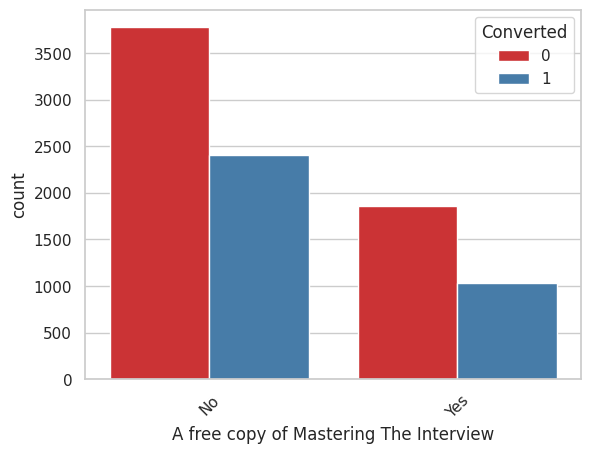

In [2245]:
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 45)
plt.show()

Inference

Most entries are 'No'. No Inference can be drawn with this parameter.##


27) Last Notable Activity

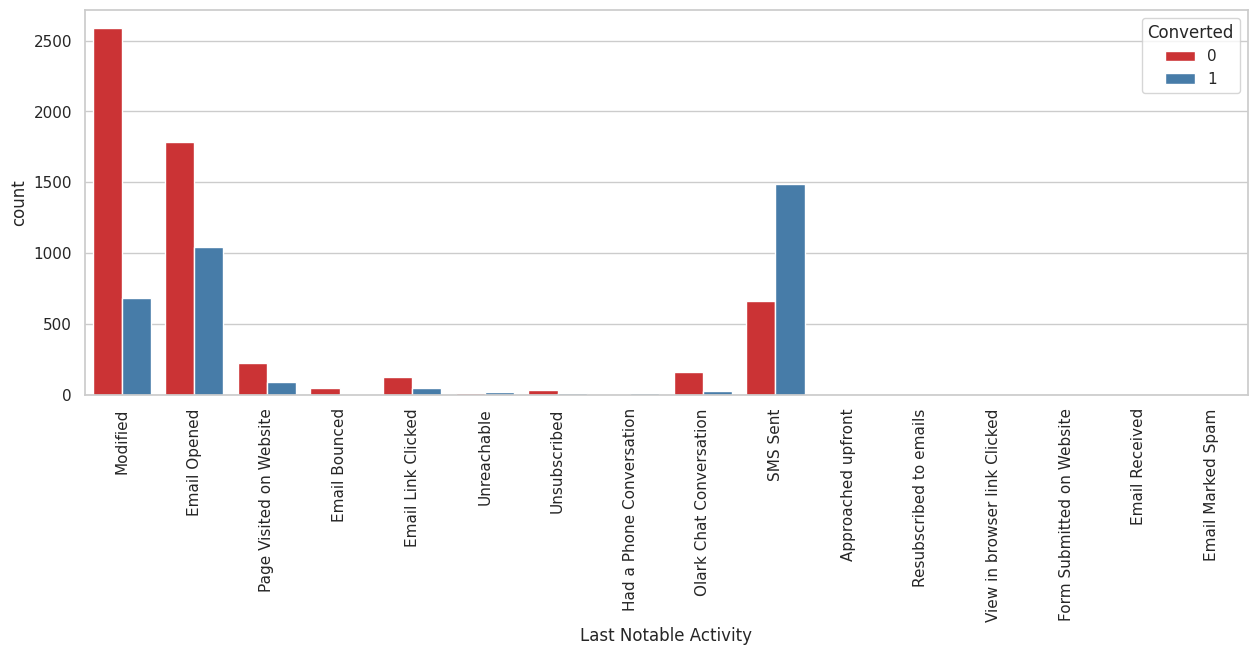

In [2246]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)
plt.show()

## Results

##### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [2247]:
leads = leads.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],axis=1)

leads.shape

In [2248]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   object 
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                     

### Data Preparation

1 Converting some binary variables (Yes/No) to 1/0

In [2249]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads[vars] = leads[vars].apply(binary_map)

##### 2) Creating Dummy variables for the categorical features:


'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [2250]:
# Last Notable Activity
dummy_data = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True).astype(np.uint8)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2251]:
# Concatenating the dummy_data to the lead_data dataframe
leads = pd.concat([leads, dummy_data], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,Select,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,Select,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping the columns for which dummies were created

In [2252]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [2253]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### 3) Splitting the data into train and test set.

In [2254]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2255]:
# Putting target variable to y
y = leads['Converted']

y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [2256]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [2257]:
X_test.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specializat

In [2258]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specializat

In [2259]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(6351, 71) (2723, 71) (6351,) (2723,)


#### 4) Scaling the features

In [2260]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2261]:
leads["Converted"] = leads["Converted"].astype(int)

In [2262]:
# Checking the Lead Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

We have almost 37% lead conversion rate.

### Feature Selection Using RFE

In [2263]:

logreg = LogisticRegression(max_iter=1000)

rfe = RFE(estimator=logreg,n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [2264]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True,  True, False, False, False,  True, False, False])

In [2265]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', np.True_, np.int64(1)),
 ('Do Not Call', np.False_, np.int64(24)),
 ('TotalVisits', np.False_, np.int64(23)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(22)),
 ('Lead Origin_Landing Page Submission', np.True_, np.int64(1)),
 ('Lead Origin_Lead Add Form', np.True_, np.int64(1)),
 ('Lead Origin_Lead Import', np.False_, np.int64(11)),
 ('Lead Source_Facebook', np.False_, np.int64(33)),
 ('Lead Source_Google', np.False_, np.int64(26)),
 ('Lead Source_Olark Chat', np.True_, np.int64(1)),
 ('Lead Source_Organic Search', np.False_, np.int64(36)),
 ('Lead Source_Others', np.False_, np.int64(29)),
 ('Lead Source_Reference', np.True_, np.int64(1)),
 ('Lead Source_Referral Sites', np.False_, np.int64(50)),
 ('Lead Source_Welingak Website', np.True_, np.int64(1)),
 ('Last Activity_Email Bounced', np.False_, np.int64(21)),
 ('Last Activity_Email Link Clicked', np.False_, np.int64(6)),
 ('Last Activity_Email Opened', np.Tr

In [2266]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### Model Building


Assessing the model with StatsModels



#### Model-1

In [2267]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[cols])

In [2268]:
print(X_train_sm.dtypes)
print(y_train.dtypes)


const                                                   float64
Do Not Email                                              int64
Total Time Spent on Website                             float64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Reference                                     uint8
Lead Source_Welingak Website                              uint8
Last Activity_Email Opened                                uint8
Last Activity_Other_Activity                              uint8
Last Activity_SMS Sent                                    uint8
Last Activity_Unsubscribed                                uint8
Specialization_Others                                     uint8
What is your current occupation_Student                   uint8
What is your current occupation_Unemployed                uint8
What is your current occupation_Working 

In [2269]:
X_train_sm = X_train_sm.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [2270]:
print(X_train_sm.isnull().sum())  # Check for NaNs
print(y_train.isnull().sum())


const                                                   0
Do Not Email                                            0
Total Time Spent on Website                             0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form                               0
Lead Source_Olark Chat                                  0
Lead Source_Reference                                   0
Lead Source_Welingak Website                            0
Last Activity_Email Opened                              0
Last Activity_Other_Activity                            0
Last Activity_SMS Sent                                  0
Last Activity_Unsubscribed                              0
Specialization_Others                                   0
What is your current occupation_Student                 0
What is your current occupation_Unemployed              0
What is your current occupation_Working Professional    0
City_Select                                             0
Last Notable A

In [2271]:
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
result = logm1.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.2
Date:                Sat, 15 Nov 2025   Deviance:                       5084.3
Time:                        17:14:56   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4129
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Since Pvalue of 'What is your current occupation_Working Professional' is very high, we can drop this column.

In [2272]:
print(cols)

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Opened',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Specialization_Others',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'City_Select',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [2273]:
# Dropping the column 'What is your current occupation_Working Professional'
col1 = cols.drop('What is your current occupation_Working Professional')

#### Model-2

In [2274]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2543.3
Date:                Sat, 15 Nov 2025   Deviance:                       5086.6
Time:                        17:14:56   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4127
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.4384      0.243     10.042      0.000       1.962       2.914
Do Not Email                                     -1.5887      0.197     -8.076      0.000      -1.974      -1.203
Total Time Spent on Website                       1.1105      0.041     27.149      0.000       1.030       1.191
Lead Origin_Landing Page Submission              -1.1956      0.134     -8.948      0.000      -1.458      -0.934
Lead Origin_Lead Add Form                         1.4435      0.886      1.629      0.103      -0.293       3.180
Lead Source_Olark Chat                            1.1560      0.124      9.297      0.000       0.912       1.400
Lead Source_Reference                             1.7891      0.910      1.966      0.049       0.005       3.573
Lead Source_Welingak Website                      4.0821      1.144      3.570      0.000       1.841       6.324
Last Activity_Email Opened                        0.9069      0.158      5.736      0.000       0.597       1.217
Last Activity_Other_Activity                      2.5609      0.471      5.434      0.000       1.637       3.485
Last Activity_SMS Sent                            1.4877      0.115     12.930      0.000       1.262       1.713
Last Activity_Unsubscribed                        1.4671      0.487      3.013      0.003       0.513       2.421
Specialization_Others                            -2.0509      0.167    -12.299      0.000      -2.378      -1.724
What is your current occupation_Student          -2.3042      0.288     -7.999      0.000      -2.869      -1.740
What is your current occupation_Unemployed       -2.6091      0.183    -14.234      0.000      -2.968      -2.250
City_Select                                      -0.8799      0.135     -6.521      0.000      -1.144      -0.615
Last Notable Activity_Email Opened               -0.8309      0.181     -4.602      0.000      -1.185      -0.477
Last Notable Activity_Modified                   -1.1663      0.112    -10.431      0.000      -1.385      -0.947
Last Notable Activity_Olark Chat Conversation    -1.1176      0.351     -3.185      0.001      -1.805      -0.430
Last Notable Activity_Unreachable                 1.7810      0.500      3.563      0.000       0.801       2.761
=================================================================================================================
"""

Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.

In [2275]:
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model-3

In [2276]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2544.7
Date:                Sat, 15 Nov 2025   Deviance:                       5089.5
Time:                        17:14:56   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4124
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.4536      0.243     10.114      0.000       1.978       2.929
Do Not Email                                     -1.5906      0.197     -8.086      0.000      -1.976      -1.205
Total Time Spent on Website                       1.1088      0.041     27.146      0.000       1.029       1.189
Lead Origin_Landing Page Submission              -1.2102      0.133     -9.072      0.000      -1.472      -0.949
Lead Source_Olark Chat                            1.1496      0.124      9.262      0.000       0.906       1.393
Lead Source_Reference                             3.2196      0.239     13.467      0.000       2.751       3.688
Lead Source_Welingak Website                      5.5147      0.731      7.543      0.000       4.082       6.948
Last Activity_Email Opened                        0.9103      0.158      5.762      0.000       0.601       1.220
Last Activity_Other_Activity                      2.5578      0.471      5.427      0.000       1.634       3.482
Last Activity_SMS Sent                            1.4862      0.115     12.931      0.000       1.261       1.712
Last Activity_Unsubscribed                        1.4643      0.487      3.008      0.003       0.510       2.418
Specialization_Others                            -2.0629      0.167    -12.379      0.000      -2.390      -1.736
What is your current occupation_Student          -2.3046      0.288     -8.001      0.000      -2.869      -1.740
What is your current occupation_Unemployed       -2.6065      0.183    -14.219      0.000      -2.966      -2.247
City_Select                                      -0.8857      0.135     -6.566      0.000      -1.150      -0.621
Last Notable Activity_Email Opened               -0.8371      0.180     -4.638      0.000      -1.191      -0.483
Last Notable Activity_Modified                   -1.1696      0.112    -10.470      0.000      -1.389      -0.951
Last Notable Activity_Olark Chat Conversation    -1.1223      0.351     -3.199      0.001      -1.810      -0.435
Last Notable Activity_Unreachable                 1.7757      0.500      3.552      0.000       0.796       2.756
=================================================================================================================
"""

Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.

In [2277]:
col1 = col1.drop('What is your current occupation_Student')

#### Model-4

In [2278]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2579.8
Date:                Sat, 15 Nov 2025   Deviance:                       5159.7
Time:                        17:14:57   Pearson chi2:                 6.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4059
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.6653      0.204      8.159      0.000       1.265       2.065
Do Not Email                                     -1.5900      0.193     -8.221      0.000      -1.969      -1.211
Total Time Spent on Website                       1.1135      0.041     27.438      0.000       1.034       1.193
Lead Origin_Landing Page Submission              -1.2312      0.132     -9.309      0.000      -1.490      -0.972
Lead Source_Olark Chat                            1.1030      0.123      8.959      0.000       0.862       1.344
Lead Source_Reference                             3.2744      0.237     13.792      0.000       2.809       3.740
Lead Source_Welingak Website                      5.5266      0.731      7.557      0.000       4.093       6.960
Last Activity_Email Opened                        0.9084      0.157      5.801      0.000       0.601       1.215
Last Activity_Other_Activity                      2.6156      0.475      5.505      0.000       1.684       3.547
Last Activity_SMS Sent                            1.5060      0.114     13.199      0.000       1.282       1.730
Last Activity_Unsubscribed                        1.4987      0.478      3.137      0.002       0.562       2.435
Specialization_Others                            -2.0580      0.166    -12.395      0.000      -2.383      -1.733
What is your current occupation_Unemployed       -1.7940      0.128    -13.993      0.000      -2.045      -1.543
City_Select                                      -0.9205      0.134     -6.866      0.000      -1.183      -0.658
Last Notable Activity_Email Opened               -0.8470      0.179     -4.730      0.000      -1.198      -0.496
Last Notable Activity_Modified                   -1.1695      0.111    -10.548      0.000      -1.387      -0.952
Last Notable Activity_Olark Chat Conversation    -1.2459      0.352     -3.537      0.000      -1.936      -0.556
Last Notable Activity_Unreachable                 1.8040      0.496      3.639      0.000       0.832       2.776
=================================================================================================================
"""

# Checking for VIF values:

In [2279]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Email Opened,8.01
11,What is your current occupation_Unemployed,7.36
6,Last Activity_Email Opened,7.10
2,Lead Origin_Landing Page Submission,4.96
14,Last Notable Activity_Modified,3.04
8,Last Activity_SMS Sent,2.65
12,City_Select,2.56
10,Specialization_Others,2.35
3,Lead Source_Olark Chat,2.08
1,Total Time Spent on Website,1.29


In [2280]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
3009,0.185885
1012,0.021557
9226,0.354548
4750,0.878249
7987,0.772626
1281,0.762589
2880,0.092804
4971,0.970610
7536,0.852332
1248,0.739902


In [2281]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18588479, 0.02155716, 0.35454766, 0.8782493 , 0.7726262 ,
       0.76258895, 0.09280351, 0.97061029, 0.85233224, 0.73990191])

### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [2282]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.185885,3009
1,0,0.021557,1012
2,0,0.354548,9226
3,1,0.878249,4750
4,1,0.772626,7987


##### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [2283]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.185885,3009,0
1,0,0.021557,1012,0
2,0,0.354548,9226,0
3,1,0.878249,4750,1
4,1,0.772626,7987,1


Making the Confusion matrix

In [2284]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3448  457]
 [ 713 1733]]


In [2285]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8157770429853566


# Metrics beyond simply accuracy

In [2286]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2287]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7085036794766967


In [2288]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8829705505761843


In [2289]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11702944942381562


In [2290]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.791324200913242


In [2291]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8286469598654169


We found out that our specificity was good (~88%) but our sensitivity was only 70%. Hence, this needed to be taken care of.



We have got sensitivity of 70% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve
An ROC curve demonstrates several things:

*It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

*The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

*The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [2292]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2293]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

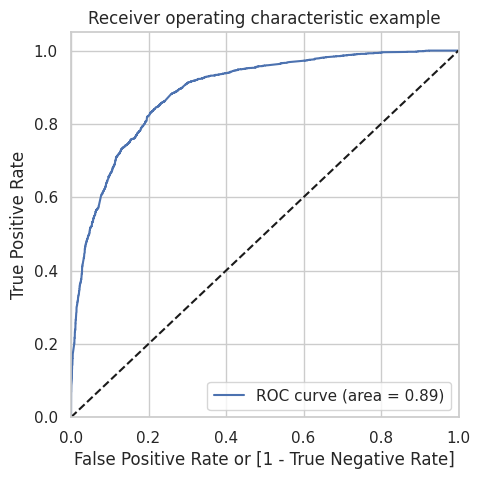

In [2294]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

##### Since we have higher (0.89) area under the ROC curve , therefore our model is a good one.

    

### Finding Optimal Cutoff Point


##### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [2295]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.185885,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.021557,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.354548,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.878249,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.772626,7987,1,1,1,1,1,1,1,1,1,0,0


In [2296]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.605731  0.975879  0.373880
0.2   0.2  0.768855  0.921913  0.672983
0.3   0.3  0.799559  0.860180  0.761588
0.4   0.4  0.807589  0.774734  0.828169
0.5   0.5  0.815777  0.708504  0.882971
0.6   0.6  0.803023  0.632461  0.909859
0.7   0.7  0.785860  0.533524  0.943918
0.8   0.8  0.757991  0.421096  0.969014
0.9   0.9  0.716265  0.285364  0.986172


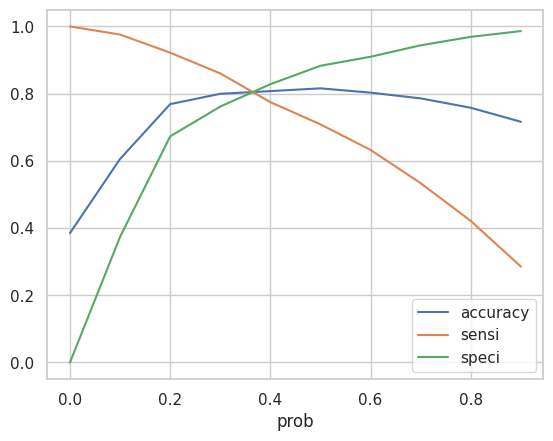

In [2297]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.34 is the optimum point to take it as a cutoff probability.

In [2298]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.185885,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.021557,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.354548,9226,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.878249,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.772626,7987,1,1,1,1,1,1,1,1,1,0,0,1


## Assigning Lead Score to the Training data

In [2299]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.185885,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.021557,1012,0,1,0,0,0,0,0,0,0,0,0,0,2
2,0,0.354548,9226,0,1,1,1,1,0,0,0,0,0,0,1,35
3,1,0.878249,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.772626,7987,1,1,1,1,1,1,1,1,1,0,0,1,77


## Model Evaluation

In [2300]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.8071169894504803


In [2301]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3080,  825],
       [ 400, 2046]])

In [2302]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2303]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8364677023712184


In [2304]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7887323943661971


In [2305]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.2112676056338028


In [2306]:
# Positive predictive value  or Precision
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7126436781609196


In [2307]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8850574712643678


## Precision and Recall


*Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.

*Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [2308]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3448,  457],
       [ 713, 1733]])

In [2309]:
# Precision
precision=TP / (TP + FP)

print("Precision : ",precision)

Precision :  0.7126436781609196


In [2310]:
# Recall
recall_train=TP / (TP + FN)

print("Recall :",recall_train)

Recall : 0.8364677023712184


## Using sklearn utilities for the same

In [2311]:
from sklearn.metrics import precision_score, recall_score

In [2312]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.791324200913242


In [2313]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.7085036794766967


## recision and recall tradeoff


In [2314]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    1
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [2315]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

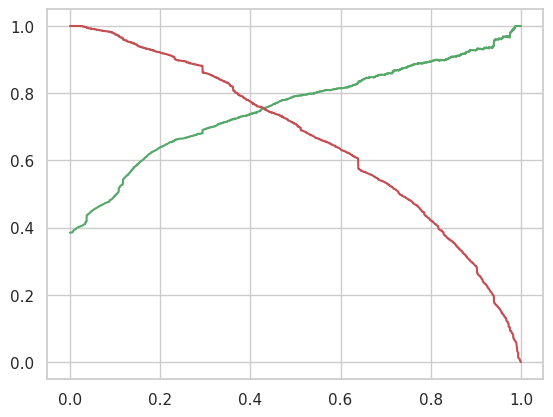

In [2316]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

## Making predictions on the test set


Scaling the test data

In [2317]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0,0.643547,0.595662,1.510766,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
82,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8199,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7077,0,0,0.643547,-0.046500,1.510766,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [2318]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,4.0,157,4.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,5.0,1513,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,2.0,74,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,8.0,164,6.0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,0,3.0,829,1.5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2879,0,0,2.0,589,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6501,0,0,8.0,1335,6.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7155,0,0,3.0,515,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [2319]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [2320]:
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Select,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,0.284772,-0.600595,0.955505,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1490,0,0,0.643547,1.887326,1.510766,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4216,0,0,-1.150329,-0.888650,-1.265540,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,1.719873,-0.587751,2.066027,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,0,0,-0.074003,0.632357,-0.432648,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2879,0,0,-0.432779,0.192017,-0.155018,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6501,0,0,1.719873,1.560740,2.066027,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7155,0,0,-0.074003,0.056246,0.400244,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [2321]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Unemployed,City_Select,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
1490,0,1.887326,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0
4216,0,-0.888650,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0


In [2322]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

,0
3271,0.057643
1490,0.930670
7936,0.049094
4216,0.975614
3830,0.124227
1800,0.416108
6507,0.358969
4821,0.290137
4223,0.939447
4714,0.149735


In [2323]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2324]:
# Let's see the head
y_pred_1.head()

,0
3271,0.057643
1490,0.930670
7936,0.049094
4216,0.975614
3830,0.124227


In [2325]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [2326]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [2327]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2328]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2329]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.057643
1,1,1490,0.930670
2,0,7936,0.049094
3,1,4216,0.975614
4,0,3830,0.124227


In [2330]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2331]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [2332]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.057643
1,1490,1,0.930670
2,7936,0,0.049094
3,4216,1,0.975614
4,3830,0,0.124227


In [2333]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [2334]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.057643,0
1,1490,1,0.930670,1
2,7936,0,0.049094,0
3,4216,1,0.975614,1
4,3830,0,0.124227,0


In [2335]:
y_pred_final['Converted'] = y_pred_final['Converted'].astype(int)
y_pred_final['final_predicted'] = y_pred_final['final_predicted'].astype(int)

# Now check accuracy
print("Accuracy:", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))


Accuracy: 0.799118619170033


In [2336]:
y_pred_final['Converted'] = y_pred_final['Converted'].astype(str)
y_pred_final['final_predicted'] = y_pred_final['final_predicted'].astype(str)


In [2337]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1366,  368],
       [ 179,  810]])

In [2338]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2339]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.8190091001011123


In [2340]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7877739331026529


In [2341]:
precision=TP / (TP + FP)
print("precision :",precision)

precision : 0.6876061120543294


In [2342]:
# Positive predictive value  or Precision
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6876061120543294


In [2343]:
# Recall
recall_test=TP / (TP + FN)

print("Recall :",recall_test)

Recall : 0.8190091001011123


## Assigning Lead Score to the Testing data

In [2344]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.057643,0,6
1,1490,1,0.930670,1,93
2,7936,0,0.049094,0,5
3,4216,1,0.975614,1,98
4,3830,0,0.124227,0,12


## Observations:

After running the model on the Test Data , we obtain:


## Accuracy : 80 %

## Sensitivity : 82 %

## Specificity : 79 %

### Results :
## Comparing the values obtained for Train & Test:
                             
## Train Data:
                             
## Accuracy : 81.0 %
                             
## Sensitivity : 83.7 %
                             
## Specificity : 79 %
                             
## Test Data:
                             
## Accuracy : 80 %
                             
## Sensitivity : 82 %
                             
## Specificity : 79%